# Importing Liabrares and Reading Dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
LoanTap = pd.read_csv("C:/Users/Satyam/Downloads/logistic_regression (1).csv")

In [12]:
LoanTap.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# EDA and Preprocessing

In [13]:
LoanTap.shape

(396030, 27)

In [14]:
LoanTap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [15]:
LoanTap.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [16]:
LoanTap.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [17]:
LoanTap.groupby(["loan_status"])["loan_status"].count()/LoanTap.shape[0]

loan_status
Charged Off    0.196129
Fully Paid     0.803871
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

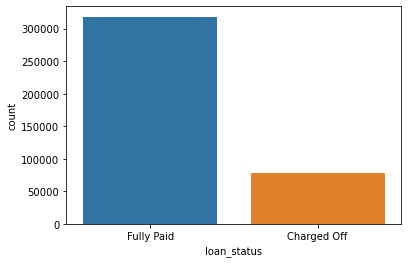

In [18]:
sns.countplot(x=LoanTap["loan_status"])

In [19]:
LoanTap["installment"].unique()

array([329.48, 265.68, 506.97, ..., 343.14, 118.13, 572.44])

In [20]:
LoanTap["installment"].nunique()

55706

In [21]:
LoanTap["loan_amnt"].unique()

array([10000.,  8000., 15600., ..., 36275., 36475.,   725.])

In [22]:
LoanTap["loan_amnt"].nunique()

1397

In [23]:
LoanTap["loan_amnt"].min()

500.0

In [24]:
LoanTap["loan_amnt"].max()

40000.0

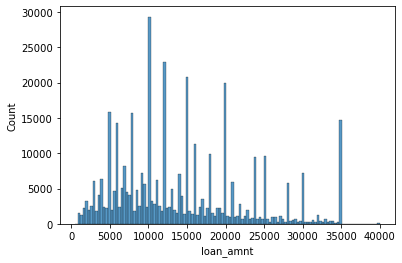

In [25]:
sns.histplot(x=LoanTap["loan_amnt"])
plt.show()

<AxesSubplot:xlabel='term', ylabel='count'>

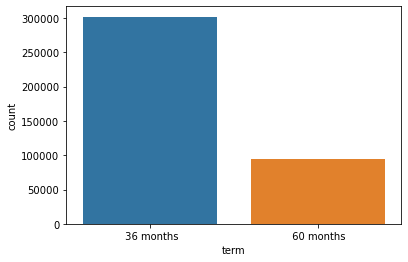

In [26]:
sns.countplot(x=LoanTap["term"])

In [27]:
LoanTap["int_rate"].min()

5.32

In [28]:
LoanTap["int_rate"].max()

30.99

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

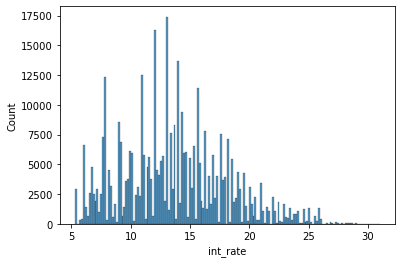

In [29]:
sns.histplot(x=LoanTap["int_rate"])

In [30]:
LoanTap["grade"].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

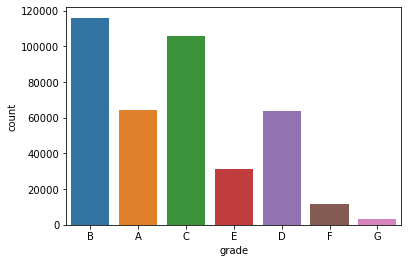

In [31]:
sns.countplot(x=LoanTap["grade"])

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

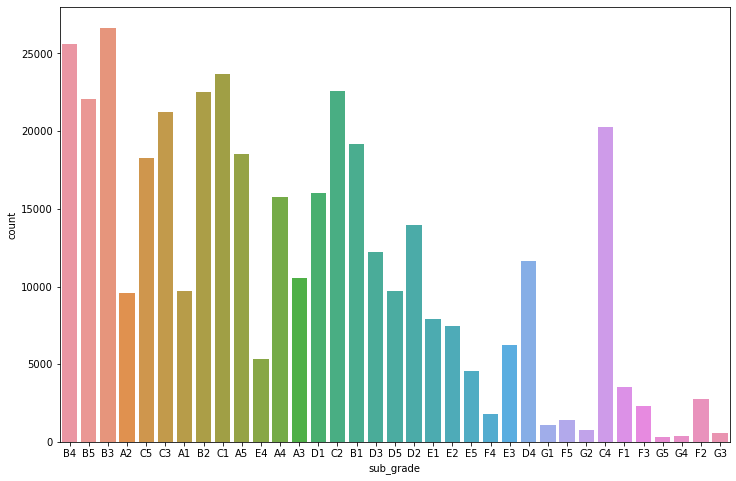

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x=LoanTap["sub_grade"])


In [33]:
LoanTap["emp_length"].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

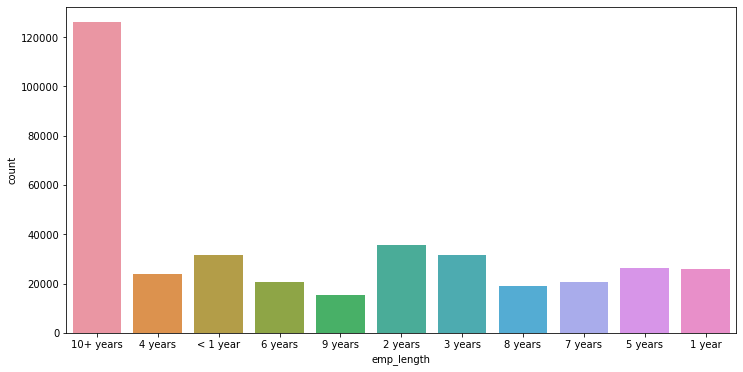

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x=LoanTap["emp_length"])

In [35]:
LoanTap["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

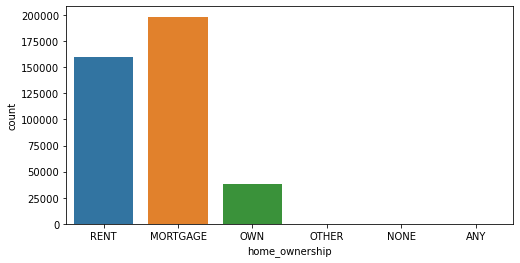

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(x=LoanTap["home_ownership"])

In [37]:
LoanTap["dti"].unique()

array([26.24, 22.05, 12.79, ..., 40.56, 47.09, 55.53])

In [38]:
LoanTap["loan_amnt"].nunique()

1397

In [39]:
LoanTap["dti"].min()

0.0

In [40]:
LoanTap["dti"].max()

9999.0

In [41]:
LoanTap["purpose"].value_counts()/LoanTap.shape[0]

debt_consolidation    0.592145
credit_card           0.209628
home_improvement      0.060677
other                 0.053493
major_purchase        0.022195
small_business        0.014395
car                   0.011860
medical               0.010595
moving                0.007207
vacation              0.006191
house                 0.005558
wedding               0.004575
renewable_energy      0.000831
educational           0.000649
Name: purpose, dtype: float64

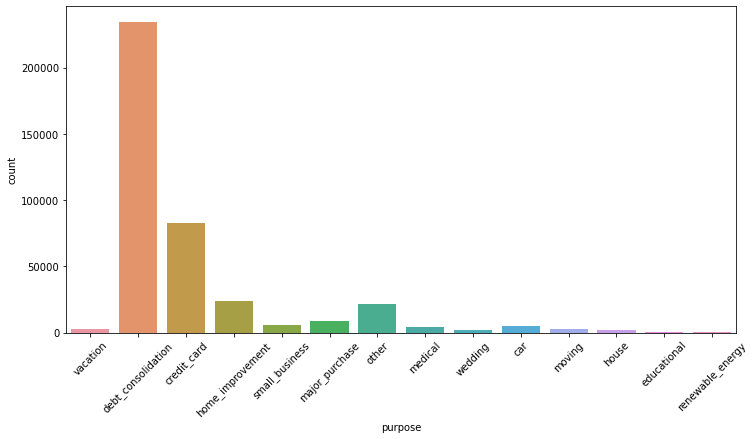

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x=LoanTap["purpose"])
plt.xticks(rotation=45)
plt.show()

In [43]:
LoanTap["title"].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

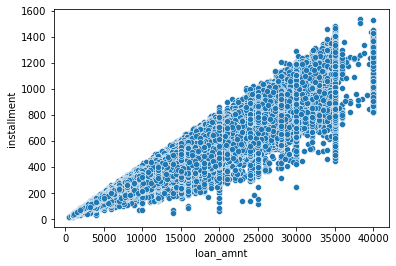

In [44]:
sns.scatterplot(x=LoanTap["loan_amnt"],y=LoanTap["installment"])

Installment and loan_amt are positively correlated so we can drop one of them.

In [45]:
LoanTap.drop(columns="installment",inplace=True)

In [46]:
LoanTap.groupby(["loan_status","grade"])["loan_status"].count()

loan_status  grade
Charged Off  A          4036
             B         14587
             C         22449
             D         18338
             E         11765
             F          5037
             G          1461
Fully Paid   A         60151
             B        101431
             C         83538
             D         45186
             E         19723
             F          6735
             G          1593
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

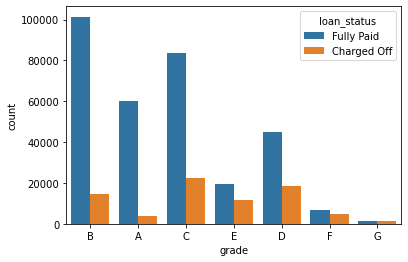

In [47]:
sns.countplot(x=LoanTap["grade"],hue=LoanTap["loan_status"])

In [48]:
LoanTap.groupby(["emp_title","loan_status"])["loan_status"].count().sort_values(ascending=False)

emp_title                                         loan_status
Teacher                                           Fully Paid     3532
Manager                                           Fully Paid     3321
Registered Nurse                                  Fully Paid     1476
RN                                                Fully Paid     1467
Supervisor                                        Fully Paid     1425
                                                                 ... 
Hunter Truck Sales                                Fully Paid        1
Hunterdon County Educational Services Commission  Fully Paid        1
Hunterdon Developmental Center                    Fully Paid        1
Hunterdon Healthcare supportive Services          Fully Paid        1
​License Compliance Investigator                  Fully Paid        1
Name: loan_status, Length: 185292, dtype: int64

In [49]:
fully_paid_charged_off_loans = LoanTap.loc[LoanTap['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Step 2: Group by job title and count the number of occurrences for each job title
job_title_counts = fully_paid_charged_off_loans.groupby('emp_title')['loan_status'].value_counts().unstack().fillna(0)

# Step 3: Calculate the percentage of Fully paid for each emp title
job_title_counts['percentage of Fully paid'] = (job_title_counts['Fully Paid'] / ((job_title_counts['Charged Off'] + job_title_counts['Fully Paid'])))*100  

# Step 4: Sort the job titles based on the percentage in descending order
sorted_job_titles = job_title_counts.sort_values(by='percentage of Fully paid', ascending=False)

# Step 5: Select the top 2  affordable job titles
top_2_job_titles = sorted_job_titles.head(2)

# Display the results
print("Top 2 affordable Job Titles ")
print(top_2_job_titles[['Fully Paid', 'Charged Off', 'percentage of Fully paid']])

Top 2 affordable Job Titles 
loan_status                Fully Paid  Charged Off  percentage of Fully paid
emp_title                                                                   
       NSA Industries llc         1.0          0.0                     100.0
Recreation Coordinator            1.0          0.0                     100.0


In [50]:
LoanTap["emp_title"].nunique()/LoanTap.shape[0]

0.43710072469257377

In [51]:
LoanTap["sub_grade"].nunique()

35

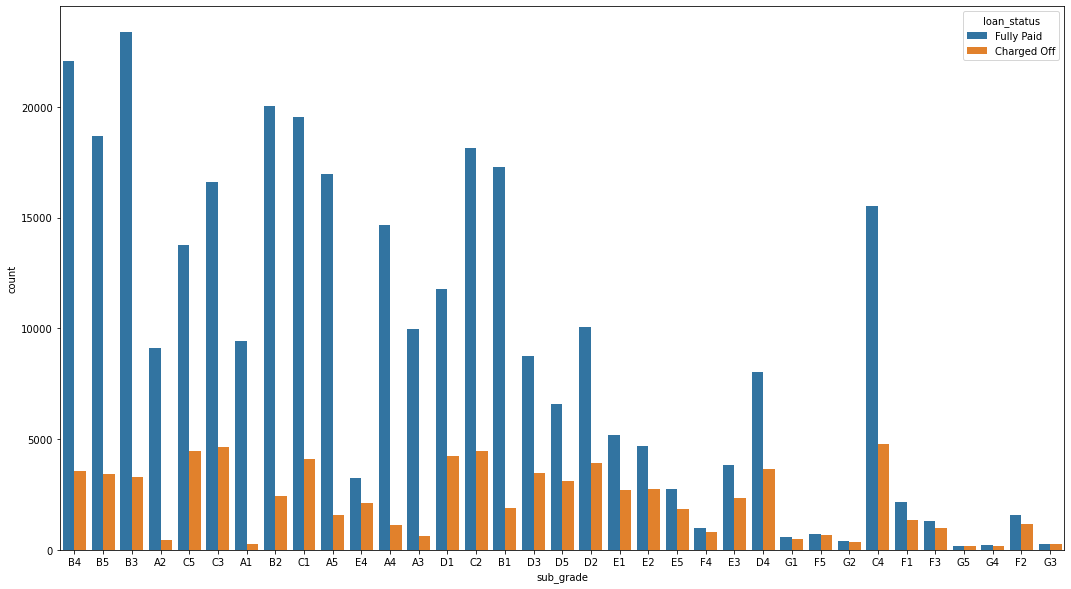

In [52]:
plt.figure(figsize=(18,10))
sns.countplot(x=LoanTap["sub_grade"],hue=LoanTap["loan_status"])
plt.show()

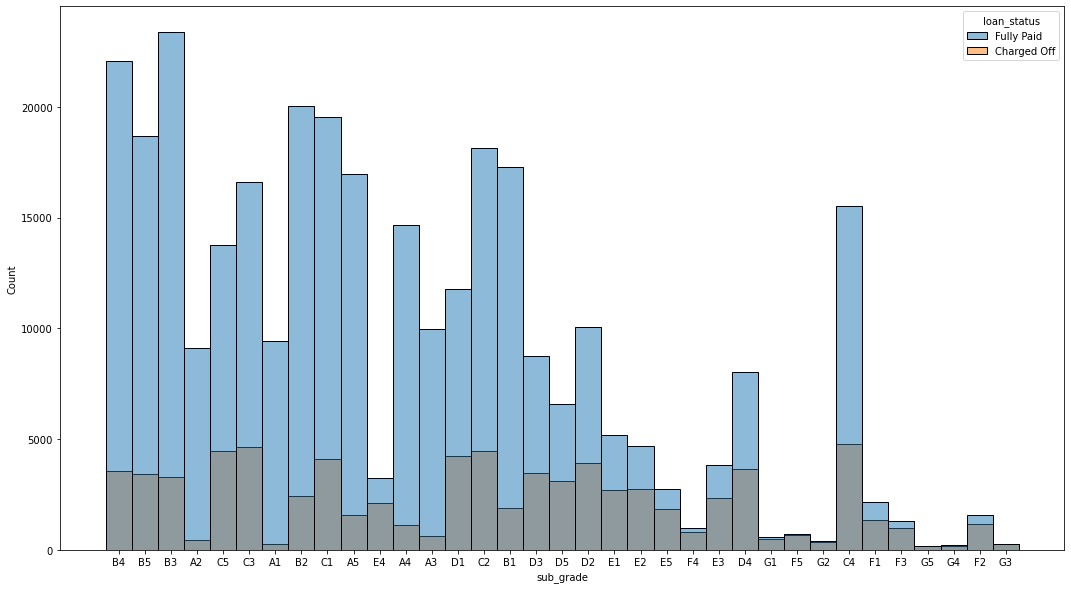

In [53]:
plt.figure(figsize=(18,10))
sns.histplot(x=LoanTap["sub_grade"],hue=LoanTap["loan_status"])
plt.show()

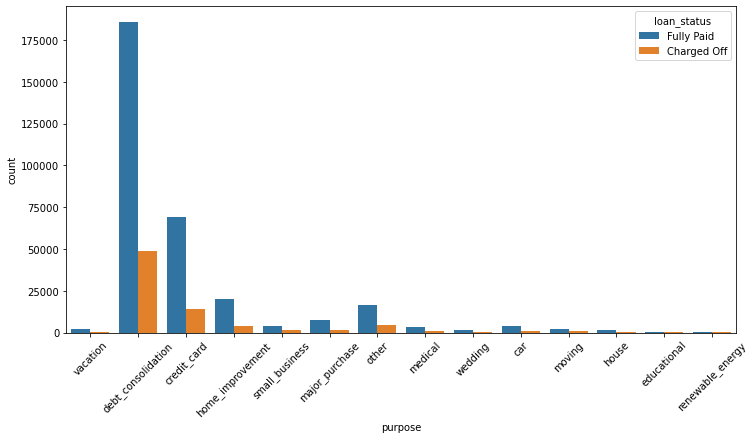

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(x=LoanTap["purpose"],hue=LoanTap["loan_status"])
plt.xticks(rotation=45)
plt.show()

In [55]:
LoanTap["title"].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [56]:
LoanTap["title"].nunique()

48817

Some of the columns are not Good Predictors for prediction of Loan status so we need to drop those feature.

In [57]:
irre_cols= ["grade","sub_grade","emp_title","title"]
LoanTap.drop(columns=irre_cols,inplace=True)

In [58]:
LoanTap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   emp_length            377729 non-null  object 
 4   home_ownership        396030 non-null  object 
 5   annual_inc            396030 non-null  float64
 6   verification_status   396030 non-null  object 
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  earliest_cr_line      396030 non-null  object 
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [59]:
LoanTap["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [60]:
LoanTap["term"] = LoanTap["term"].map({" 36 months" : 36," 60 months" : 60})
LoanTap["emp_length"] = LoanTap["emp_length"].map({"10+ years" : 10,"4 years" : 4,"< 1 year": 0,
                                                   "6 years": 6,"9 years" : 9,"2 years" : 2,"3 years" : 3,
                                                  "8 years" : 8,"7 years" : 7,"5 years":5,"1 year":1,np.nan:np.nan})

In [61]:
LoanTap["emp_length"].unique()

array([10.,  4.,  0.,  6.,  9.,  2.,  3.,  8.,  7.,  5.,  1., nan])

In [62]:
LoanTap["term"].unique()

array([36, 60], dtype=int64)

In [63]:
LoanTap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   emp_length            377729 non-null  float64
 4   home_ownership        396030 non-null  object 
 5   annual_inc            396030 non-null  float64
 6   verification_status   396030 non-null  object 
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  earliest_cr_line      396030 non-null  object 
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [64]:
LoanTap["pub_rec"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5.,  8.,  9., 10., 11.,  7., 19.,
       13., 40., 17., 86., 12., 24., 15.])

In [65]:
LoanTap["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [66]:
LoanTap["mort_acc"].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [67]:
flag_cration_cols= ["pub_rec","pub_rec_bankruptcies","mort_acc"]
for i in flag_cration_cols:
    LoanTap[i] = LoanTap[i].apply(lambda x:1 if x>1 else 0)

In [68]:
LoanTap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   emp_length            377729 non-null  float64
 4   home_ownership        396030 non-null  object 
 5   annual_inc            396030 non-null  float64
 6   verification_status   396030 non-null  object 
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  earliest_cr_line      396030 non-null  object 
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  int64  
 14  revol_bal             396030 non-null  float64
 15  

In [69]:
LoanTap.groupby(["purpose","loan_status"])["loan_status"].value_counts()/LoanTap.shape[0]

purpose             loan_status  loan_status
car                 Charged Off  Charged Off    0.001598
                    Fully Paid   Fully Paid     0.010262
credit_card         Charged Off  Charged Off    0.035033
                    Fully Paid   Fully Paid     0.174595
debt_consolidation  Charged Off  Charged Off    0.122819
                    Fully Paid   Fully Paid     0.469326
educational         Charged Off  Charged Off    0.000106
                    Fully Paid   Fully Paid     0.000543
home_improvement    Charged Off  Charged Off    0.010320
                    Fully Paid   Fully Paid     0.050357
house               Charged Off  Charged Off    0.001096
                    Fully Paid   Fully Paid     0.004462
major_purchase      Charged Off  Charged Off    0.003656
                    Fully Paid   Fully Paid     0.018539
medical             Charged Off  Charged Off    0.002300
                    Fully Paid   Fully Paid     0.008295
moving              Charged Off  Charged Of

In [70]:
pd.crosstab(LoanTap["purpose"],LoanTap["loan_status"],margins=True)

loan_status,Charged Off,Fully Paid,All
purpose,,,
car,633,4064,4697
credit_card,13874,69145,83019
debt_consolidation,48640,185867,234507
educational,42,215,257
home_improvement,4087,19943,24030
house,434,1767,2201
major_purchase,1448,7342,8790
medical,911,3285,4196
moving,670,2184,2854


In [71]:
from scipy.stats import chi2_contingency


In [72]:
LoanTap["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [73]:
LoanTap["loan_status"]= LoanTap["loan_status"].map({"Fully Paid" : 0, "Charged Off" : 1})

In [74]:
LoanTap.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,10.0,RENT,117000.0,Not Verified,Jan-2015,0,vacation,...,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,4.0,MORTGAGE,65000.0,Not Verified,Jan-2015,0,debt_consolidation,...,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,0.0,RENT,43057.0,Source Verified,Jan-2015,0,credit_card,...,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,6.0,RENT,54000.0,Not Verified,Nov-2014,0,credit_card,...,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,9.0,MORTGAGE,55000.0,Verified,Apr-2013,1,credit_card,...,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,0,0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [75]:
LoanTap["issue_d"] = pd.to_datetime(LoanTap["issue_d"])
LoanTap["earliest_cr_line"] = pd.to_datetime(LoanTap["earliest_cr_line"])
LoanTap["credit_history_length"] = LoanTap["issue_d"] - LoanTap["earliest_cr_line"]
LoanTap["credit_history_length"] = LoanTap["credit_history_length"].apply(lambda x:str(x).split()[0])
LoanTap["credit_history_length"] = LoanTap["credit_history_length"].apply(lambda x:int(x))
LoanTap.drop(columns=["issue_d","earliest_cr_line"],inplace=True)

In [76]:
LoanTap.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,credit_history_length
0,10000.0,36,11.44,10.0,RENT,117000.0,Not Verified,0,vacation,26.24,...,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",8980
1,8000.0,36,11.99,4.0,MORTGAGE,65000.0,Not Verified,0,debt_consolidation,22.05,...,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",3836
2,15600.0,36,10.49,0.0,RENT,43057.0,Source Verified,0,credit_card,12.79,...,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",2710
3,7200.0,36,6.49,6.0,RENT,54000.0,Not Verified,0,credit_card,2.60,...,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813",2983
4,24375.0,60,17.27,9.0,MORTGAGE,55000.0,Verified,1,credit_card,33.95,...,0,24584.0,69.8,43.0,f,INDIVIDUAL,0,0,"679 Luna Roads\r\nGreggshire, VA 11650",5145


In [77]:
LoanTap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              396030 non-null  float64
 1   term                   396030 non-null  int64  
 2   int_rate               396030 non-null  float64
 3   emp_length             377729 non-null  float64
 4   home_ownership         396030 non-null  object 
 5   annual_inc             396030 non-null  float64
 6   verification_status    396030 non-null  object 
 7   loan_status            396030 non-null  int64  
 8   purpose                396030 non-null  object 
 9   dti                    396030 non-null  float64
 10  open_acc               396030 non-null  float64
 11  pub_rec                396030 non-null  int64  
 12  revol_bal              396030 non-null  float64
 13  revol_util             395754 non-null  float64
 14  total_acc              396030 non-nu

<AxesSubplot:>

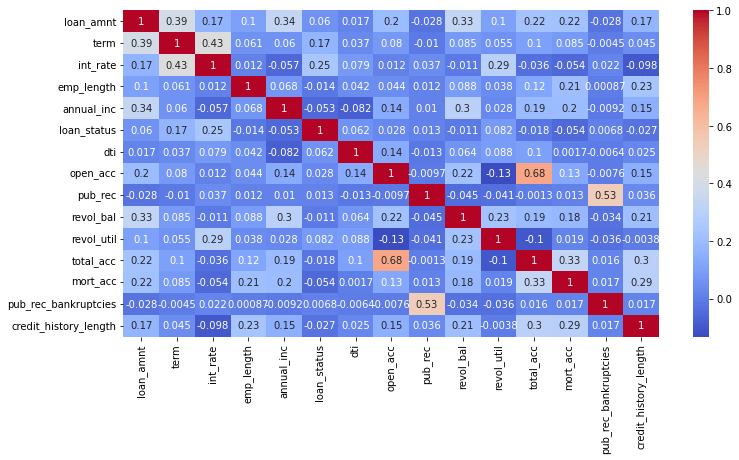

In [78]:
plt.figure(figsize=(12,6))
sns.heatmap(LoanTap.corr(),annot=True,cmap="coolwarm")

In [79]:
LoanTap.isna().sum()

loan_amnt                    0
term                         0
int_rate                     0
emp_length               18301
home_ownership               0
annual_inc                   0
verification_status          0
loan_status                  0
purpose                      0
dti                          0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                 276
total_acc                    0
initial_list_status          0
application_type             0
mort_acc                     0
pub_rec_bankruptcies         0
address                      0
credit_history_length        0
dtype: int64

In [80]:
LoanTap.dropna(inplace=True)

In [81]:
LoanTap.isna().sum()

loan_amnt                0
term                     0
int_rate                 0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
loan_status              0
purpose                  0
dti                      0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               0
total_acc                0
initial_list_status      0
application_type         0
mort_acc                 0
pub_rec_bankruptcies     0
address                  0
credit_history_length    0
dtype: int64

<AxesSubplot:>

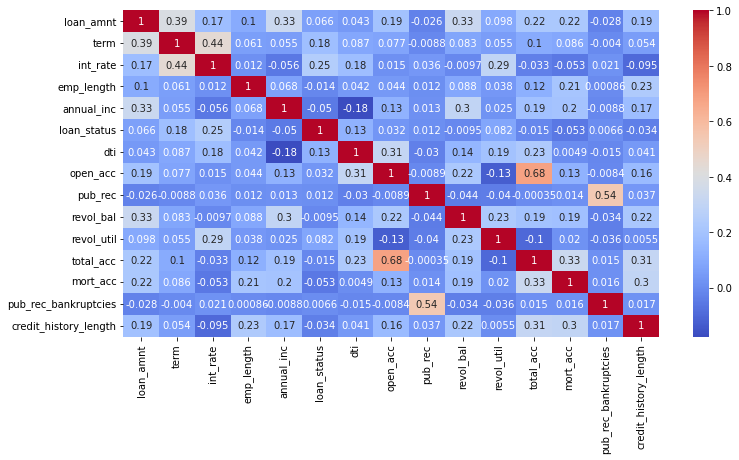

In [82]:
plt.figure(figsize=(12,6))
sns.heatmap(LoanTap.corr(),annot=True,cmap="coolwarm")

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
LoanTap["purpose"].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [85]:
LoanTap["address"] = LoanTap["address"].apply(lambda x:x.split()[-1])

In [86]:
!pip install category_encoders

In [87]:
LoanTap["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [88]:
LoanTap["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [89]:
LoanTap["home_ownership"]= LoanTap["home_ownership"].map({"RENT" : "RENT","MORTGAGE" : "MORTGAGE", "OWN" : "OWN", "OTHER" :"OTHER","NONE" : "OTHER","ANY" : "OTHER"})

In [90]:
LoanTap["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [91]:
LoanTap = pd.get_dummies(LoanTap,columns=["home_ownership"],drop_first=True)

In [92]:
LoanTap["verification_status"].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [93]:
LoanTap["verification_status"] = LoanTap["verification_status"].apply(lambda x:0 if x=="Not Verified" else 1)

In [94]:
LoanTap["verification_status"].unique()

array([0, 1], dtype=int64)

In [95]:
LoanTap["initial_list_status"].unique()

array(['w', 'f'], dtype=object)

In [96]:
LoanTap["initial_list_status"] = LoanTap["initial_list_status"].map({"w" : 0, "f" : 1})

In [97]:
LoanTap["initial_list_status"].unique()

array([0, 1], dtype=int64)

In [98]:
LoanTap["application_type"].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [99]:
LoanTap = pd.get_dummies(LoanTap,columns=["application_type"],drop_first=True)

In [100]:
import category_encoders as ce
from sklearn.model_selection import train_test_split

In [101]:
Y = LoanTap["loan_status"]
X= LoanTap.drop(columns=["loan_status"])

In [102]:
X.shape

(377464, 23)

In [103]:
Y.shape

(377464,)

In [104]:
X_train_val,X_test,Y_train_val,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
X_train,X_val,Y_train,Y_val = train_test_split(X_train_val,Y_train_val,test_size=0.2,random_state=2)

In [105]:
X_train.shape

(241576, 23)

In [106]:
Y_train.shape

(241576,)

In [107]:
X_val.shape

(60395, 23)

In [108]:
Y_val.shape

(60395,)

In [109]:
X_test.shape

(75493, 23)

In [110]:
Y_test.shape

(75493,)

In [111]:
ce_target = ce.TargetEncoder(cols=["purpose","address"])
X_train = ce_target.fit_transform(X_train,Y_train)
X_val = ce_target.transform(X_val)
X_test = ce_target.transform(X_test)

In [112]:
Y_train.value_counts()

0    195110
1     46466
Name: loan_status, dtype: int64

In [113]:
!pip install imblearn

In [114]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [115]:
scale = StandardScaler()
X_train_sm=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)
X_val_sm = pd.DataFrame(scale.transform(X_val),columns=X_val.columns)
X_test_sm = pd.DataFrame(scale.transform(X_test),columns=X_test.columns)

In [116]:
smt = SMOTE()
X_sm,Y_sm = smt.fit_resample(X_train_sm,Y_train)
print(Y_sm.value_counts())

0    195110
1    195110
Name: loan_status, dtype: int64


# Model Building

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [118]:
lr = LogisticRegression()
lr.fit(X_sm,Y_sm)

LogisticRegression()

In [119]:
coef_ar = np.array(lr.coef_).reshape(-1,1)

In [120]:
feature_coef = pd.DataFrame()
feature_coef["feature"] = X_train_sm.columns
feature_coef["coef"] = coef_ar
feature_coef.sort_values(by="coef",ascending=False)

,feature,coef
16,address,10.359420
2,int_rate,0.479142
7,dti,0.213384
1,term,0.197237
8,open_acc,0.164075
20,home_ownership_RENT,0.126253
11,revol_util,0.109548
0,loan_amnt,0.088155
6,purpose,0.082685
5,verification_status,0.058828


In [121]:
Y_val_pred = lr.predict(X_val_sm)

In [122]:
precision_score(Y_val,Y_val_pred)

0.49166532668703433

In [123]:
recall_score(Y_val,Y_val_pred)

0.7953698083759646

In [124]:
f1_score(Y_val,Y_val_pred)

0.6076846637959589

In [125]:
Y_train_pred = lr.predict(X_train_sm)

In [126]:
precision_score(Y_train,Y_train_pred)

0.4958245363957882

In [127]:
recall_score(Y_train,Y_train_pred)

0.7935049283346963

In [128]:
f1_score(Y_train,Y_train_pred)

0.6103005073285387

In [129]:
y_val_pred_probabilities=lr.predict_proba(X_val_sm)[:,1]
y_pred_custom_threshold = (y_val_pred_probabilities > y_val_pred_probabilities.min()).astype(int)

In [131]:
from sklearn.metrics import precision_recall_curve

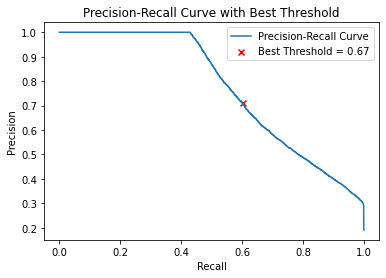

Best Threshold: 0.6747302017761609
F1-score with Best Threshold: 0.6510995451774745


In [132]:
precision, recall, thresholds = precision_recall_curve(Y_val, y_val_pred_probabilities)

# Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes F1-score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# Plot precision-recall curve with the best threshold
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], c='red', marker='x', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Best Threshold')
plt.legend()
plt.show()

print(f'Best Threshold: {best_threshold}')

# Use the best threshold to make predictions
y_pred_best_threshold = (y_val_pred_probabilities > best_threshold).astype(int)

# Evaluate performance with the best threshold
f1_best_threshold = f1_score(Y_val, y_pred_best_threshold)
print(f'F1-score with Best Threshold: {f1_best_threshold}')


In [133]:
Y_train_pred_probabilities = (lr.predict_proba(X_train_sm)[:,1]>0.68).astype(int)


In [134]:
precision_score_train = precision_score(Y_train,Y_train_pred_probabilities)
print(precision_score_train)

0.7190812260735957


In [135]:
recall_score_train = recall_score(Y_train,Y_train_pred_probabilities)
print(recall_score_train)

0.5942409503723153


In [136]:
f1_score_train = f1_score(Y_train,Y_train_pred_probabilities)
print(f1_score_train)

0.6507276262298946


In [137]:
Y_val_pred_probabilities = (lr.predict_proba(X_val_sm)[:,1]>0.68).astype(int)

In [138]:
precision_score_val  = precision_score(Y_val,Y_val_pred_probabilities)
print(precision_score_val)

0.7164007924095506


In [139]:
recall_score_val = recall_score(Y_val,Y_val_pred_probabilities)
print(recall_score_val)

0.5957686638342149


In [140]:
f1_score_val = f1_score(Y_val,Y_val_pred_probabilities)
print(f1_score_val)

0.6505396705169476


In [141]:
Y_test_pred_probabilities = (lr.predict_proba(X_test_sm)[:,1]>0.68).astype(int)

In [142]:
precision_score_test = precision_score(Y_test,Y_test_pred_probabilities)
print(precision_score_test)

0.7204310056799198


In [143]:
recall_score_test =  recall_score(Y_test,Y_test_pred_probabilities)
print(recall_score_test)

0.5916855320024696


In [144]:
f1_score_test = f1_score(Y_test,Y_test_pred_probabilities)
print(f1_score_test)

0.6497419865154996


In [145]:
cnf_mat_train=confusion_matrix(Y_train,Y_train_pred_probabilities)
print(cnf_mat_train)

[[184323  10787]
 [ 18854  27612]]


In [146]:
cnf_mat_val=confusion_matrix(Y_val,Y_val_pred_probabilities)
print(cnf_mat_val)

[[46142  2720]
 [ 4662  6871]]


In [147]:
cnf_mat_test=confusion_matrix(Y_test,Y_test_pred_probabilities)
print(cnf_mat_test)

[[57569  3347]
 [ 5952  8625]]


In [148]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve

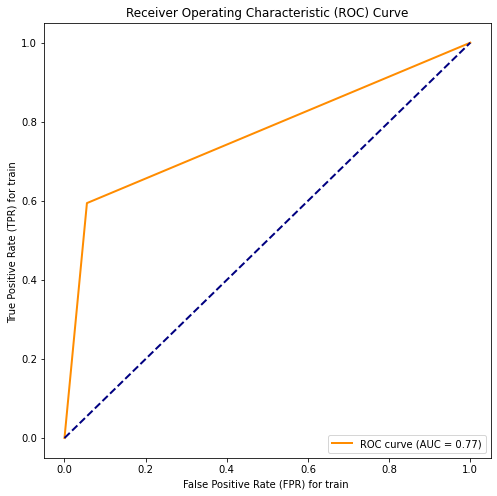

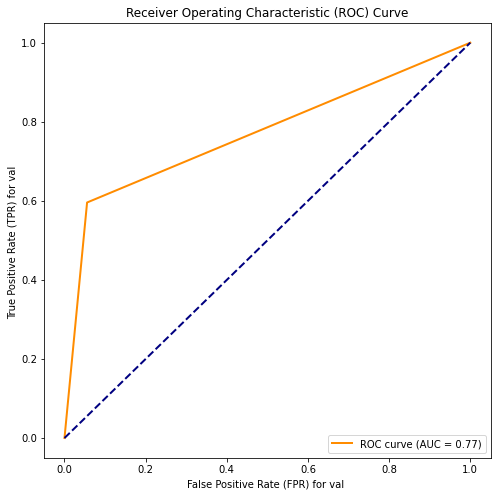

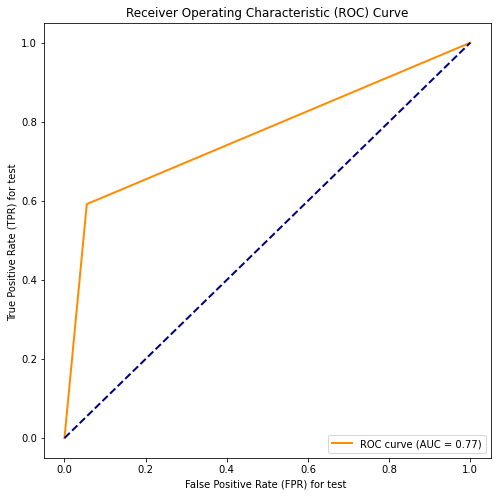

In [149]:
true_pred = [[Y_train,Y_train_pred_probabilities],[Y_val,Y_val_pred_probabilities],[Y_test,Y_test_pred_probabilities]]
data = ["train","val","test"]
for i in range(len(data)):
    fpr,tpr,thresolds = roc_curve(true_pred[i][0],true_pred[i][1])
    roc_auc = auc(fpr,tpr)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel(f'False Positive Rate (FPR) for {data[i]} ')
    plt.ylabel(f'True Positive Rate (TPR) for {data[i]} ')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Tradeoff Questions

Q1-How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

Ans : Precision Score for model has 0.72 so we can say that our model is able to predict correctly 72 deafaulters out of 100.

Q2 : Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

Ans : Yes, it is important for any Loan provider platform that they will give loan to those people who arer going to return their loan as per given time frame so we have to build model which has high precision score(TPR). 

# Insights 

1- 80.38% people have paid their loan.

2- Loan Amount and Installment Features are positively correlated so we can drop one of them.

3- Majority of people have home ownership as MORTGAGE AND RENT.

4- People with grades ‘A’ are more likely to fully pay their loan - True.

5- Top 2 affordable Job titles are NSA Industries llc and Recreation Coordinator.

6- Bank Prospective Precision should be our primary matrics because our goal is to  Find Deafulters(TP) correctly .

7- Address and int_rate are the features that heavily affected the outcome.

8-Yes Result will be Affected by Geo Loaction.

9- Best Thresold value of Probability is 0.68.

10 precision_score for train, val and test is 0.72.

11-Recall_score for train,val and test is 0.59.

12-F1_score for train,val and test is 0.65.

13- Roc_Auc score fortrain , val and test is 0.77

14 we can say that our model has moderate bias and Less Variance.

# Recomondation

1-Further investigate the reasons behind the impact of address and interest rate on the outcome.

2-Explore additional features like Monthly Income of Loan Borrower that could enhance the model's predictive power.

3-Regularly monitor and update the model as new data becomes available to ensure continued relevance and accuracy.